In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [5]:
session = Session(engine)

In [6]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
measurement_results = session.query(Measurements.station, Measurements.date, Measurements.prcp, Measurements.tobs).all()
station_results = session.query(Stations.station, Stations.latitude, Stations.longitude, Stations.elevation).all()

In [8]:
measurement_results

[('USC00519397', '2010-01-01', 0.08, 65.0),
 ('USC00519397', '2010-01-02', 0.0, 63.0),
 ('USC00519397', '2010-01-03', 0.0, 74.0),
 ('USC00519397', '2010-01-04', 0.0, 76.0),
 ('USC00519397', '2010-01-06', None, 73.0),
 ('USC00519397', '2010-01-07', 0.06, 70.0),
 ('USC00519397', '2010-01-08', 0.0, 64.0),
 ('USC00519397', '2010-01-09', 0.0, 68.0),
 ('USC00519397', '2010-01-10', 0.0, 73.0),
 ('USC00519397', '2010-01-11', 0.01, 64.0),
 ('USC00519397', '2010-01-12', 0.0, 61.0),
 ('USC00519397', '2010-01-14', 0.0, 66.0),
 ('USC00519397', '2010-01-15', 0.0, 65.0),
 ('USC00519397', '2010-01-16', 0.0, 68.0),
 ('USC00519397', '2010-01-17', 0.0, 64.0),
 ('USC00519397', '2010-01-18', 0.0, 72.0),
 ('USC00519397', '2010-01-19', 0.0, 66.0),
 ('USC00519397', '2010-01-20', 0.0, 66.0),
 ('USC00519397', '2010-01-21', 0.0, 69.0),
 ('USC00519397', '2010-01-22', 0.0, 67.0),
 ('USC00519397', '2010-01-23', 0.0, 67.0),
 ('USC00519397', '2010-01-24', 0.01, 71.0),
 ('USC00519397', '2010-01-25', 0.0, 67.0),
 ('USC

In [9]:
station_results

[('USC00519397', 21.2716, -157.8168, 3.0),
 ('USC00513117', 21.4234, -157.8015, 14.6),
 ('USC00514830', 21.5213, -157.8374, 7.0),
 ('USC00517948', 21.3934, -157.9751, 11.9),
 ('USC00518838', 21.4992, -158.0111, 306.6),
 ('USC00519523', 21.33556, -157.71139, 19.5),
 ('USC00519281', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 21.3152, -157.9992, 0.9),
 ('USC00516128', 21.3331, -157.8025, 152.4)]

In [10]:
measurement_satation_id = [result[0] for result in measurement_results[:]]
measurement_date = [result[1] for result in measurement_results[:]]
prcp = [result[2] for result in measurement_results[:]]
tobs = [result[3] for result in measurement_results[:]]
prcp

[0.08,
 0.0,
 0.0,
 0.0,
 None,
 0.06,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.04,
 0.12,
 0.0,
 None,
 0.03,
 0.01,
 None,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 0.03,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.12,
 0.08,
 0.03,
 0.0,
 0.43,
 0.06,
 None,
 0.0,
 0.0,
 0.0,
 0.06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.17,
 0.15,
 0.27,
 0.01,
 0.0,
 0.01,
 0.0,
 0.01,
 0.01,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.04,
 0.01,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.2,
 0.08,
 0.01,
 0.0,
 0.05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.0,
 0.0,
 0.0,
 None,
 0.0,
 0.05,
 0.0,
 0.0,
 0.02,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02,

In [11]:
station_id = [result[0] for result in station_results[:]]
station_lat = [result[1] for result in station_results[:]]
station_lng = [result[2] for result in station_results[:]]
station_elevation = [result[3] for result in station_results[:]]
station_id

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [12]:
measurement_frame = pd.DataFrame(measurement_results[:], columns=['station', 'date', 'prcp', 'tobs'])
measurement_frame

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [13]:
station_frame = pd.DataFrame(station_results[:], columns=['station', 'lat', 'lng', 'elevation'])
station_frame

,station,lat,lng,elevation
0,USC00519397,21.27160,-157.81680,3.0
1,USC00513117,21.42340,-157.80150,14.6
2,USC00514830,21.52130,-157.83740,7.0
3,USC00517948,21.39340,-157.97510,11.9
4,USC00518838,21.49920,-158.01110,306.6
5,USC00519523,21.33556,-157.71139,19.5
6,USC00519281,21.45167,-157.84889,32.9
7,USC00511918,21.31520,-157.99920,0.9
8,USC00516128,21.33310,-157.80250,152.4


In [14]:
measurement_station_frame = pd.merge(measurement_frame, station_frame, how='left', on=['station', 'station'])
measurement_station_frame

,station,date,prcp,tobs,lat,lng,elevation
0,USC00519397,2010-01-01,0.08,65.0,21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63.0,21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74.0,21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76.0,21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73.0,21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0,21.3331,-157.8025,152.4
19546,USC00516128,2017-08-20,NaN,78.0,21.3331,-157.8025,152.4
19547,USC00516128,2017-08-21,0.56,76.0,21.3331,-157.8025,152.4
19548,USC00516128,2017-08-22,0.50,76.0,21.3331,-157.8025,152.4


In [15]:
measurement_station_frame['station'].nunique()

9

In [16]:
measurement_station_frame['station'].value_counts(ascending=False)

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [17]:
measurement_station_frame['date'] = pd.to_datetime(measurement_station_frame['date'])

In [18]:
summary = measurement_station_frame.groupby('station').mean()
summary[['prcp','tobs']]

,prcp,tobs
station,,
USC00511918,0.047971,71.615968
USC00513117,0.141921,72.689184
USC00514830,0.121058,74.873297
USC00516128,0.429988,70.915008
USC00517948,0.063602,74.684402
USC00518838,0.207222,72.724070
USC00519281,0.212352,71.663781
USC00519397,0.049020,74.553231
USC00519523,0.114961,74.543649


In [19]:
last_year = measurement_station_frame.set_index('date').last("12M")
last_year

,station,prcp,tobs,lat,lng,elevation
date,,,,,,
2016-09-01,USC00519281,0.02,80.0,21.45167,-157.84889,32.9
2016-09-02,USC00519281,0.01,80.0,21.45167,-157.84889,32.9
2016-09-03,USC00519281,0.12,78.0,21.45167,-157.84889,32.9
2016-09-04,USC00519281,0.14,78.0,21.45167,-157.84889,32.9
2016-09-05,USC00519281,0.03,78.0,21.45167,-157.84889,32.9
...,...,...,...,...,...,...
2017-08-19,USC00516128,0.09,71.0,21.33310,-157.80250,152.4
2017-08-20,USC00516128,NaN,78.0,21.33310,-157.80250,152.4
2017-08-21,USC00516128,0.56,76.0,21.33310,-157.80250,152.4


In [20]:
last_year_prcp = last_year['prcp']
last_year_prcp

date
2016-09-01    0.02
2016-09-02    0.01
2016-09-03    0.12
2016-09-04    0.14
2016-09-05    0.03
              ... 
2017-08-19    0.09
2017-08-20     NaN
2017-08-21    0.56
2017-08-22    0.50
2017-08-23    0.45
Name: prcp, Length: 4934, dtype: float64

In [21]:
year_prcp_frame = pd.DataFrame(last_year_prcp[:], columns=['prcp'])
year_prcp_frame

,prcp
date,
2016-09-01,0.02
2016-09-02,0.01
2016-09-03,0.12
2016-09-04,0.14
2016-09-05,0.03
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [22]:
last_year_tobs = last_year['tobs']
last_year_tobs

date
2016-09-01    80.0
2016-09-02    80.0
2016-09-03    78.0
2016-09-04    78.0
2016-09-05    78.0
              ... 
2017-08-19    71.0
2017-08-20    78.0
2017-08-21    76.0
2017-08-22    76.0
2017-08-23    76.0
Name: tobs, Length: 4934, dtype: float64

In [23]:
year_tobs_frame = pd.DataFrame(last_year_tobs[:], columns=['tobs'])

In [24]:
most_frq_station = measurement_station_frame[measurement_station_frame['station']=='USC00519281']
most_frq_station

,station,date,prcp,tobs,lat,lng,elevation
12187,USC00519281,2010-01-01,0.15,70.0,21.45167,-157.84889,32.9
12188,USC00519281,2010-01-02,0.00,62.0,21.45167,-157.84889,32.9
12189,USC00519281,2010-01-03,0.00,74.0,21.45167,-157.84889,32.9
12190,USC00519281,2010-01-04,0.00,75.0,21.45167,-157.84889,32.9
12191,USC00519281,2010-01-05,0.00,74.0,21.45167,-157.84889,32.9
...,...,...,...,...,...,...,...
14954,USC00519281,2017-08-14,0.00,77.0,21.45167,-157.84889,32.9
14955,USC00519281,2017-08-15,0.32,77.0,21.45167,-157.84889,32.9
14956,USC00519281,2017-08-16,0.12,76.0,21.45167,-157.84889,32.9
14957,USC00519281,2017-08-17,0.01,76.0,21.45167,-157.84889,32.9


In [25]:
frq_station_year = most_frq_station.set_index('date').last("12M")
frq_station_year

,station,prcp,tobs,lat,lng,elevation
date,,,,,,
2016-09-01,USC00519281,0.02,80.0,21.45167,-157.84889,32.9
2016-09-02,USC00519281,0.01,80.0,21.45167,-157.84889,32.9
2016-09-03,USC00519281,0.12,78.0,21.45167,-157.84889,32.9
2016-09-04,USC00519281,0.14,78.0,21.45167,-157.84889,32.9
2016-09-05,USC00519281,0.03,78.0,21.45167,-157.84889,32.9
...,...,...,...,...,...,...
2017-08-14,USC00519281,0.00,77.0,21.45167,-157.84889,32.9
2017-08-15,USC00519281,0.32,77.0,21.45167,-157.84889,32.9
2017-08-16,USC00519281,0.12,76.0,21.45167,-157.84889,32.9


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

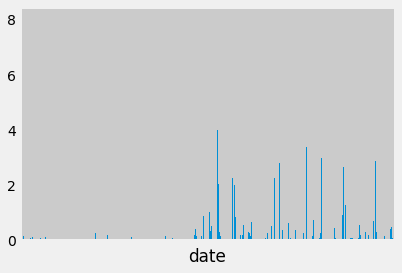

In [26]:
year_prcp = last_year['prcp']
subplot = year_prcp.plot(kind='bar')
ax = subplot.axes
ax.set_xticklabels([])
fig = ax.get_figure()
fig.show

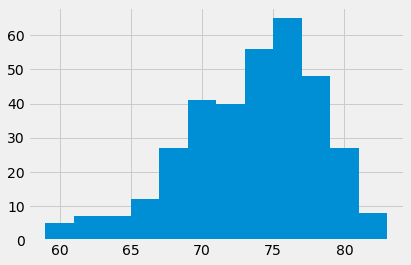

In [27]:
most_frq_tobs = frq_station_year['tobs']
plt.hist(most_frq_tobs, bins=12)
plt.show()